In [35]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv

In [2]:
#Creating empty graph
G = nx.Graph()

In [3]:
#Adding Nodes
G.add_node(1)

In [4]:
#Adding list of nodes
G.add_nodes_from([2,3])

In [5]:
G.add_node(4)

In [6]:
#Which nodes are in the Graph
G.nodes()

NodeView((1, 2, 3, 4))

In [7]:
#adding edges between 1 and 2
G.add_edge(1,2)


In [8]:
#information of graph
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 1
Average degree:   0.5000


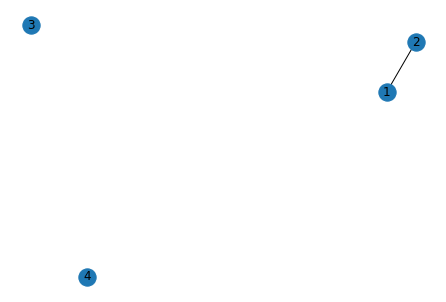

In [9]:
#drawing a graph
nx.draw(G,with_labels=True)

ADDING AND INSPECTING ATTRIBUTES

In [10]:
#Adding attributes at creation
#nodes
G.add_node(5,favourite_color = "blue")
G.add_nodes_from([(6,{"favourite_color":"red"}),
                  (7,{"favourite_color":"purple"})])


In [11]:
#edges attributes
G.add_edge(5, 6, relationship = "bestfriends")


In [12]:
#attributes of node 5
print("attributes of Node 5: ",G.node[5])

attributes of Node 5:  {'favourite_color': 'blue'}


In [13]:
#attributes of edges from 5 to 6
print("attributes of edge between 5 and 6 : ",G[5][6])

attributes of edge between 5 and 6 :  {'relationship': 'bestfriends'}


ADDING ATTRIBUTES TO EXISTING NODES

In [14]:
favourite_foods = {
    1 : {'favourite_food':'pizza'},
    2 : {'favourite_food':'pizza'},
    3 : {'favourite_food':'pizza'},
    4 : {'favourite_food':'pizza'},
    5 : {'favourite_food':'pizza'},
    6 : {'favourite_food':'pizza'},
    7 : {'favourite_food':'pizza'},
          }
  

In [15]:
nx.set_node_attributes(G,favourite_foods)

In [16]:
print(G.node[4]['favourite_food'])

pizza


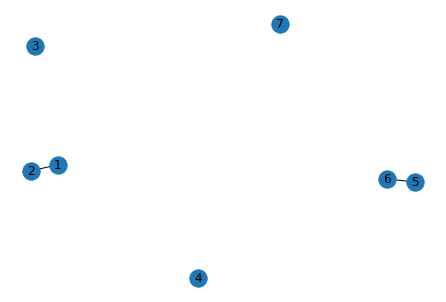

In [17]:
nx.draw(G,with_labels=True)

In [38]:
edges = []
with open('ga_edgelist.csv') as f:
    filereader = csv.reader(f,delimiter=",",quotechar='"')
    next(filereader)
    for row in filereader:
        edges.append(row)




In [39]:
edges[0:5]

[['lexi', 'sloan'],
 ['lexi', 'karev'],
 ['owen', 'yang'],
 ['owen', 'altman'],
 ['sloan', 'torres']]

In [40]:
GA = nx.from_edgelist(edges) #creates a graph object

In [41]:
print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


In [42]:
ga_edges = pd.read_csv('ga_edgelist.csv')
ga_edges.head()

,from,to
0,lexi,sloan
1,lexi,karev
2,owen,yang
3,owen,altman
4,sloan,torres


In [48]:
GA = nx.from_pandas_edgelist(ga_edges,source="from",target="to")

In [49]:
print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


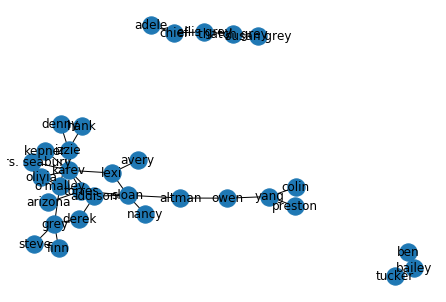

In [50]:
nx.draw(GA,with_labels=True)

In [57]:
ga_adj = pd.read_csv('ga_adj.csv',index_col=0)
ga_adj.iloc[:5,:5]

,denny,kepner,grey,colin,finn
denny,0.0,0.0,0.0,0.0,0.0
kepner,0.0,0.0,0.0,0.0,0.0
grey,0.0,0.0,0.0,0.0,1.0
colin,0.0,0.0,0.0,0.0,0.0
finn,0.0,0.0,1.0,0.0,0.0


In [58]:
GAAdj = nx.from_numpy_matrix(ga_adj.values)

In [59]:
print(GAAdj.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


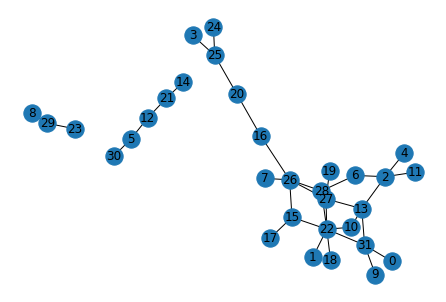

In [60]:
nx.draw(GAAdj,with_labels=True)

In [63]:
label_mapping = dict(zip(GAAdj.nodes,ga_adj.columns))
GAAdj = nx.relabel_nodes(GAAdj,label_mapping)

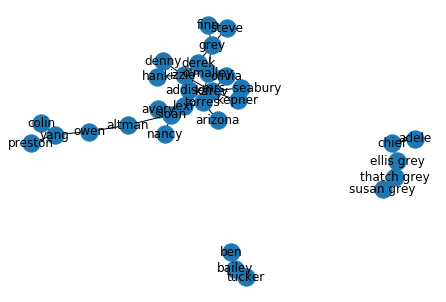

In [65]:
nx.draw_spring(GAAdj,with_labels=True)

In [66]:
print(nx.info(GA))
print(nx.info(GAAdj))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250
Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


In [67]:
print("Isomorphic?",nx.is_isomorphic(GA,GAAdj))

Isomorphic? True
